# Example 1:
#   Gaussian Source (FWHM $ = 2\mathrm{"}$) 
# + Gaussian PSF (PSF$(t)$: FWHM $\sim 0.75{''} \rightarrow 1.0{''}$, $\sim 1.0{''} \rightarrow 0.75{''}$)

In [1]:
! eups list -s | grep lsst_distrib

lsst_distrib          gdf42428520+1ee9eac2e9 	w_2023_19 setup


In [2]:
import glob
import galsim
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from astropy.table import Table, vstack
from psfxt import *

def read_pkl(f):
    
    # Open dict
    d = dict()
    with open(f, 'rb') as f:
        d = pkl.load(f)
    
    # Delete unnecessary keys 
    # to save space
    #del d['image_mean']
    
    # Format for vstack
    for key in d.keys():
        d[key] = [d[key]]

    return d

## Simulation of Gaussian Source + Gaussian PSF on LSSTCam Sensor

Simulation parameters:

    params['niter'] = 1000 # Number of images to simulate at each 
    params['imsize'] = (25,25)
    params['source_sigma'] = 4.5
    params['bf_strength'] = 1.0
    params['diffusion_factor'] = 1.0
    params['nrecalc'] = 100
    params['nsteps'] = 5
    params['t0'] = 0.
    params['tf'] = 15.



In [3]:
# Load in the data for each simulation
data = np.sort(np.asarray(glob.glob("./output/*[0-8].pkl")))
data = np.asarray([f for f in data if "bfstrength" not in f])
N = int(len(data) / 2.)

data = np.fliplr(data.reshape((2,N)).T)
print(data)

# Store the simulated data
cols = ('peak', 'peak_err', 'ixx','iyy','ixy','ixx_err','iyy_err','ixy_err')
cols_types = ('f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4')
small2large_data = Table(names=cols, dtype=cols_types)
large2small_data = Table(names=cols, dtype=cols_types)

for i, d in enumerate(data):
    small2large_output = read_pkl(d[0]) 
    large2small_output = read_pkl(d[1])
    
    small2large_data = vstack([small2large_data, Table(small2large_output)])
    large2small_data = vstack([large2small_data, Table(large2small_output)])
    


[['./output/small2large-process-0.pkl'
  './output/large2small-process-0.pkl']
 ['./output/small2large-process-1.pkl'
  './output/large2small-process-1.pkl']
 ['./output/small2large-process-2.pkl'
  './output/large2small-process-2.pkl']
 ['./output/small2large-process-3.pkl'
  './output/large2small-process-3.pkl']
 ['./output/small2large-process-4.pkl'
  './output/large2small-process-4.pkl']
 ['./output/small2large-process-5.pkl'
  './output/large2small-process-5.pkl']
 ['./output/small2large-process-6.pkl'
  './output/large2small-process-6.pkl']
 ['./output/small2large-process-7.pkl'
  './output/large2small-process-7.pkl']
 ['./output/small2large-process-8.pkl'
  './output/large2small-process-8.pkl']]


Text(0.5, 1.0, '2" FWHM Gaussian Source')

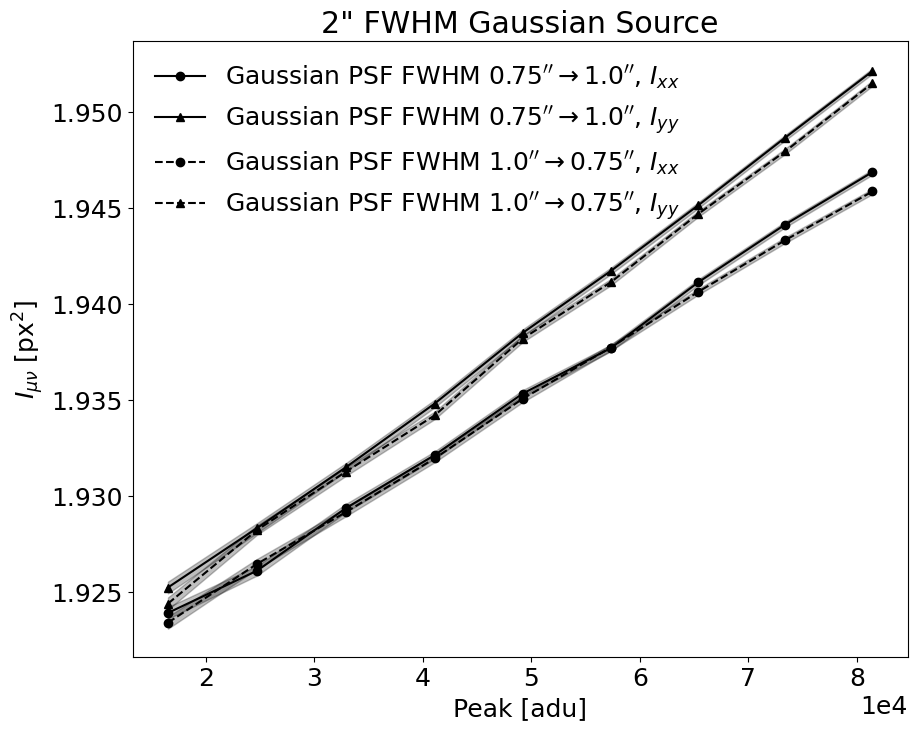

In [7]:
fig = plt.figure(figsize=(10,8))

import matplotlib
matplotlib.rcParams.update({'font.size': 18})
#4285F4
#0F9D58

indxs = np.argsort(small2large_data['peak'])

plt.plot(small2large_data['peak'][indxs], small2large_data['ixx'][indxs], "o-", color="k", label=r"Gaussian PSF FWHM $0.75{''} \rightarrow 1.0{''}$, $I_{xx}$")
plt.fill_between(small2large_data['peak'][indxs], y1 = small2large_data['ixx'][indxs]-small2large_data['ixx_err'][indxs], y2 = small2large_data['ixx'][indxs]  + small2large_data['ixx_err'][indxs], color="k", alpha=0.25)
#plt.fill_betweenx(small2large_data['ixx'], x1 = small2large_data['peak']-small2large_data['peak_err'], x2 = small2large_data['peak'] + small2large_data['peak_err'], color="#4285F4", alpha=0.5)

plt.plot(small2large_data['peak'][indxs], small2large_data['iyy'][indxs], "^-", color="k", label=r"Gaussian PSF FWHM $0.75{''} \rightarrow 1.0{''}$, $I_{yy}$")
plt.fill_between(small2large_data['peak'][indxs], y1 = small2large_data['iyy'][indxs]-small2large_data['iyy_err'][indxs], y2 = small2large_data['iyy'][indxs]  + small2large_data['iyy_err'][indxs], color="k", alpha=0.25)
#plt.fill_betweenx(small2large_data['ixx'], x1 = small2large_data['peak']-small2large_data['peak_err'], x2 = small2large_data['peak'] + small2large_data['peak_err'], color="#4285F4", alpha=0.5)

indxs = np.argsort(large2small_data['peak'])

plt.plot(large2small_data['peak'][indxs], large2small_data['ixx'][indxs], "o--", color="k", label=r"Gaussian PSF FWHM $1.0{''} \rightarrow 0.75{''}$, $I_{xx}$")
plt.fill_between(large2small_data['peak'][indxs], y1 = large2small_data['ixx'][indxs]-large2small_data['ixx_err'][indxs], y2 = large2small_data['ixx'][indxs] + large2small_data['ixx_err'][indxs], color="k", alpha=0.25)
#plt.fill_betweenx(large2small_data['ixx'], x1 = large2small_data['peak']-large2small_data['peak_err'], x2 = large2small_data['peak'] + large2small_data['peak_err'], color="#0F9D58", alpha=0.5)

plt.plot(large2small_data['peak'][indxs], large2small_data['iyy'][indxs], "^--", color="k", label=r"Gaussian PSF FWHM $1.0{''} \rightarrow 0.75{''}$, $I_{yy}$")
plt.fill_between(large2small_data['peak'][indxs], y1 = large2small_data['iyy'][indxs]-large2small_data['iyy_err'][indxs], y2 = large2small_data['iyy'][indxs] + large2small_data['iyy_err'][indxs], color="k", alpha=0.25)
#plt.fill_betweenx(large2small_data['ixx'], x1 = large2small_data['peak']-large2small_data['peak_err'], x2 = large2small_data['peak'] + large2small_data['peak_err'], color="#0F9D58", alpha=0.5)


plt.xlabel("Peak [adu]")
plt.ylabel(r"$I_{\mu\nu}$ [px$^2$]")

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(frameon=False)
plt.title("2\" FWHM Gaussian Source")



/lscratch/abrought/tmp/ipykernel_2489920/32642915.py:3: RuntimeWarning: divide by zero encountered in divide
  sig_diff = np.divide(np.asarray(small2large_data[8]['image_mean']) - np.asarray(large2small_data[8]['image_mean']), np.sqrt(np.asarray(small2large_data[8]['image_mean'])) / np.sqrt(1000))
/lscratch/abrought/tmp/ipykernel_2489920/32642915.py:3: RuntimeWarning: invalid value encountered in divide
  sig_diff = np.divide(np.asarray(small2large_data[8]['image_mean']) - np.asarray(large2small_data[8]['image_mean']), np.sqrt(np.asarray(small2large_data[8]['image_mean'])) / np.sqrt(1000))
/lscratch/abrought/tmp/ipykernel_2489920/32642915.py:4: RuntimeWarning: divide by zero encountered in divide
  frac_diff = np.divide(np.asarray(small2large_data[8]['image_mean']) - np.asarray(large2small_data[8]['image_mean']), np.asarray(small2large_data[8]['image_mean']))
/lscratch/abrought/tmp/ipykernel_2489920/32642915.py:4: RuntimeWarning: invalid value encountered in divide
  frac_diff = np.div

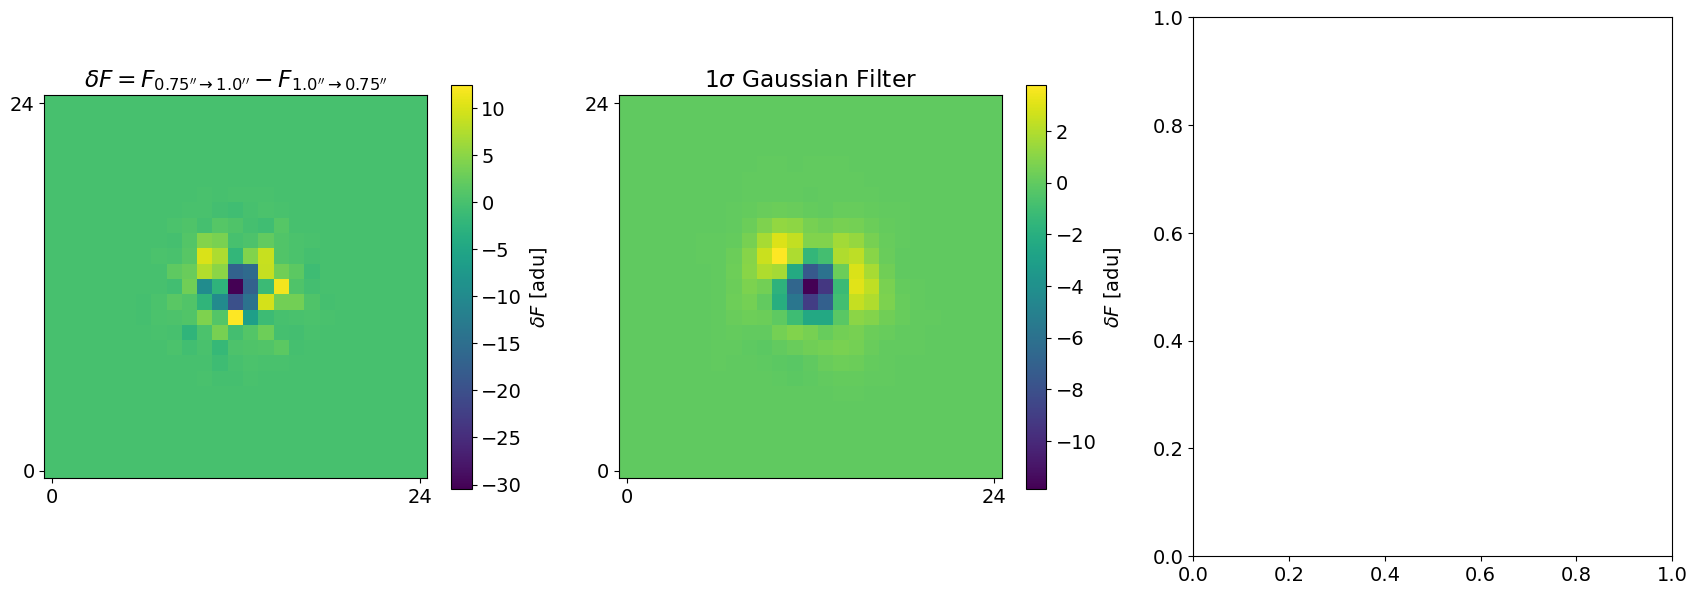

In [37]:
diff = np.asarray(small2large_data[8]['image_mean']) - np.asarray(large2small_data[8]['image_mean'])
smooth_diff = gaussian_filter(diff,1.)
sig_diff = np.divide(np.asarray(small2large_data[8]['image_mean']) - np.asarray(large2small_data[8]['image_mean']), np.sqrt(np.asarray(small2large_data[8]['image_mean'])) / np.sqrt(1000))
frac_diff = np.divide(np.asarray(small2large_data[8]['image_mean']) - np.asarray(large2small_data[8]['image_mean']), np.asarray(small2large_data[8]['image_mean']))
sig_diff[np.isnan(sig_diff)] = 0
frac_diff[np.isnan(frac_diff)] = 0
smooth_sig_diff = gaussian_filter(sig_diff,1.)

#frac_diff = np.nan_to_num(frac_diff, copy=True, nan=0.0)

matplotlib.rcParams.update({'font.size': 14})

fig, axs = plt.subplots(1,3, figsize=(21,7))

im1 = axs[0].imshow(diff, origin='lower')
axs[0].set_title(r"$\delta F = F_{0.75{''} \rightarrow 1.0{''}} - F_{1.0{''} \rightarrow 0.75{''}}$")
axs[0].set_xticks([0,24])
axs[0].set_yticks([0,24])
plt.colorbar(im1,shrink=0.75,label="$\delta F $ [adu]")


im2 = axs[1].imshow(smooth_diff, origin='lower')
axs[1].set_title(r"$1\sigma$ Gaussian Filter")
axs[1].set_xticks([0,24])
axs[1].set_yticks([0,24])
plt.colorbar(im2,shrink=0.75,label="$\delta F $ [adu]")


#im3 = axs[2].imshow(frac_diff, origin='lower')
#axs[2].set_title(r"$1\sigma$ Gaussian Filter")
#axs[2].set_xticks([0,24])
#axs[2].set_yticks([0,24])
#plt.colorbar(im3,shrink=0.75,label=r'$\delta F / \sigma_{1000} $)' ) 

# Example 1:
#   Gaussian Source (FWHM $ = 0.04\mathrm{"}$) 
# + Gaussian PSF (PSF$(t)$: FWHM $\sim 0.75{''} \rightarrow 1.0{''}$, $\sim 1.0{''} \rightarrow 0.75{''}$)

In [3]:
# Load in the data for each simulation
data = np.sort(np.asarray(glob.glob("./output/*[0-8].pkl")))
data = np.asarray([f for f in data if "bfstrength" not in f])
N = int(len(data) / 2.)

data = np.fliplr(data.reshape((2,N)).T)
print(data)

# Store the simulated data
cols = ('peak', 'peak_err', 'ixx','iyy','ixy','ixx_err','iyy_err','ixy_err')
cols_types = ('f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4')
small2large_data = Table(names=cols, dtype=cols_types)
large2small_data = Table(names=cols, dtype=cols_types)

for i, d in enumerate(data):
    small2large_output = read_pkl(d[0]) 
    large2small_output = read_pkl(d[1])
    
    small2large_data = vstack([small2large_data, Table(small2large_output)])
    large2small_data = vstack([large2small_data, Table(large2small_output)])
    


[['./output/small2large-process-0.pkl'
  './output/large2small-process-0.pkl']
 ['./output/small2large-process-1.pkl'
  './output/large2small-process-1.pkl']
 ['./output/small2large-process-2.pkl'
  './output/large2small-process-2.pkl']
 ['./output/small2large-process-3.pkl'
  './output/large2small-process-3.pkl']
 ['./output/small2large-process-4.pkl'
  './output/large2small-process-4.pkl']
 ['./output/small2large-process-5.pkl'
  './output/large2small-process-5.pkl']
 ['./output/small2large-process-6.pkl'
  './output/large2small-process-6.pkl']
 ['./output/small2large-process-7.pkl'
  './output/large2small-process-7.pkl']
 ['./output/small2large-process-8.pkl'
  './output/large2small-process-8.pkl']]


Text(0.5, 1.0, '0.04" FWHM Gaussian Source')

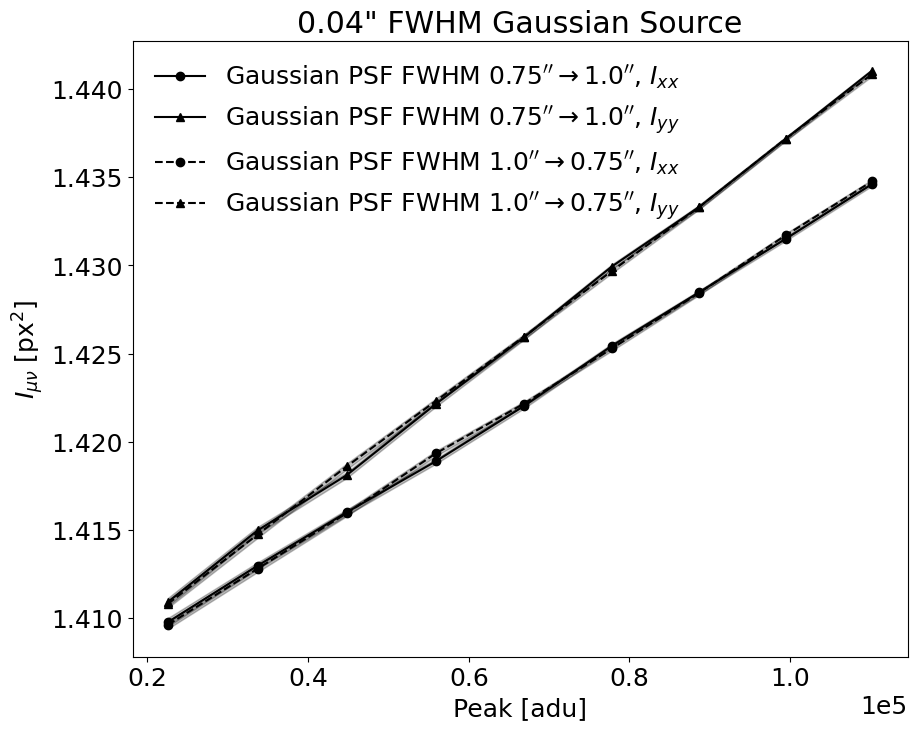

In [5]:
fig = plt.figure(figsize=(10,8))

import matplotlib
matplotlib.rcParams.update({'font.size': 18})
#4285F4
#0F9D58

indxs = np.argsort(small2large_data['peak'])

plt.plot(small2large_data['peak'][indxs], small2large_data['ixx'][indxs], "o-", color="k", label=r"Gaussian PSF FWHM $0.75{''} \rightarrow 1.0{''}$, $I_{xx}$")
plt.fill_between(small2large_data['peak'][indxs], y1 = small2large_data['ixx'][indxs]-small2large_data['ixx_err'][indxs], y2 = small2large_data['ixx'][indxs]  + small2large_data['ixx_err'][indxs], color="k", alpha=0.25)
#plt.fill_betweenx(small2large_data['ixx'], x1 = small2large_data['peak']-small2large_data['peak_err'], x2 = small2large_data['peak'] + small2large_data['peak_err'], color="#4285F4", alpha=0.5)

plt.plot(small2large_data['peak'][indxs], small2large_data['iyy'][indxs], "^-", color="k", label=r"Gaussian PSF FWHM $0.75{''} \rightarrow 1.0{''}$, $I_{yy}$")
plt.fill_between(small2large_data['peak'][indxs], y1 = small2large_data['iyy'][indxs]-small2large_data['iyy_err'][indxs], y2 = small2large_data['iyy'][indxs]  + small2large_data['iyy_err'][indxs], color="k", alpha=0.25)
#plt.fill_betweenx(small2large_data['ixx'], x1 = small2large_data['peak']-small2large_data['peak_err'], x2 = small2large_data['peak'] + small2large_data['peak_err'], color="#4285F4", alpha=0.5)

indxs = np.argsort(large2small_data['peak'])

plt.plot(large2small_data['peak'][indxs], large2small_data['ixx'][indxs], "o--", color="k", label=r"Gaussian PSF FWHM $1.0{''} \rightarrow 0.75{''}$, $I_{xx}$")
plt.fill_between(large2small_data['peak'][indxs], y1 = large2small_data['ixx'][indxs]-large2small_data['ixx_err'][indxs], y2 = large2small_data['ixx'][indxs] + large2small_data['ixx_err'][indxs], color="k", alpha=0.25)
#plt.fill_betweenx(large2small_data['ixx'], x1 = large2small_data['peak']-large2small_data['peak_err'], x2 = large2small_data['peak'] + large2small_data['peak_err'], color="#0F9D58", alpha=0.5)

plt.plot(large2small_data['peak'][indxs], large2small_data['iyy'][indxs], "^--", color="k", label=r"Gaussian PSF FWHM $1.0{''} \rightarrow 0.75{''}$, $I_{yy}$")
plt.fill_between(large2small_data['peak'][indxs], y1 = large2small_data['iyy'][indxs]-large2small_data['iyy_err'][indxs], y2 = large2small_data['iyy'][indxs] + large2small_data['iyy_err'][indxs], color="k", alpha=0.25)
#plt.fill_betweenx(large2small_data['ixx'], x1 = large2small_data['peak']-large2small_data['peak_err'], x2 = large2small_data['peak'] + large2small_data['peak_err'], color="#0F9D58", alpha=0.5)


plt.xlabel("Peak [adu]")
plt.ylabel(r"$I_{\mu\nu}$ [px$^2$]")

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(frameon=False)
plt.title("0.04\" FWHM Gaussian Source")



/lscratch/abrought/tmp/ipykernel_3391296/32642915.py:3: RuntimeWarning: divide by zero encountered in divide
  sig_diff = np.divide(np.asarray(small2large_data[8]['image_mean']) - np.asarray(large2small_data[8]['image_mean']), np.sqrt(np.asarray(small2large_data[8]['image_mean'])) / np.sqrt(1000))
/lscratch/abrought/tmp/ipykernel_3391296/32642915.py:3: RuntimeWarning: invalid value encountered in divide
  sig_diff = np.divide(np.asarray(small2large_data[8]['image_mean']) - np.asarray(large2small_data[8]['image_mean']), np.sqrt(np.asarray(small2large_data[8]['image_mean'])) / np.sqrt(1000))
/lscratch/abrought/tmp/ipykernel_3391296/32642915.py:4: RuntimeWarning: divide by zero encountered in divide
  frac_diff = np.divide(np.asarray(small2large_data[8]['image_mean']) - np.asarray(large2small_data[8]['image_mean']), np.asarray(small2large_data[8]['image_mean']))
/lscratch/abrought/tmp/ipykernel_3391296/32642915.py:4: RuntimeWarning: invalid value encountered in divide
  frac_diff = np.div

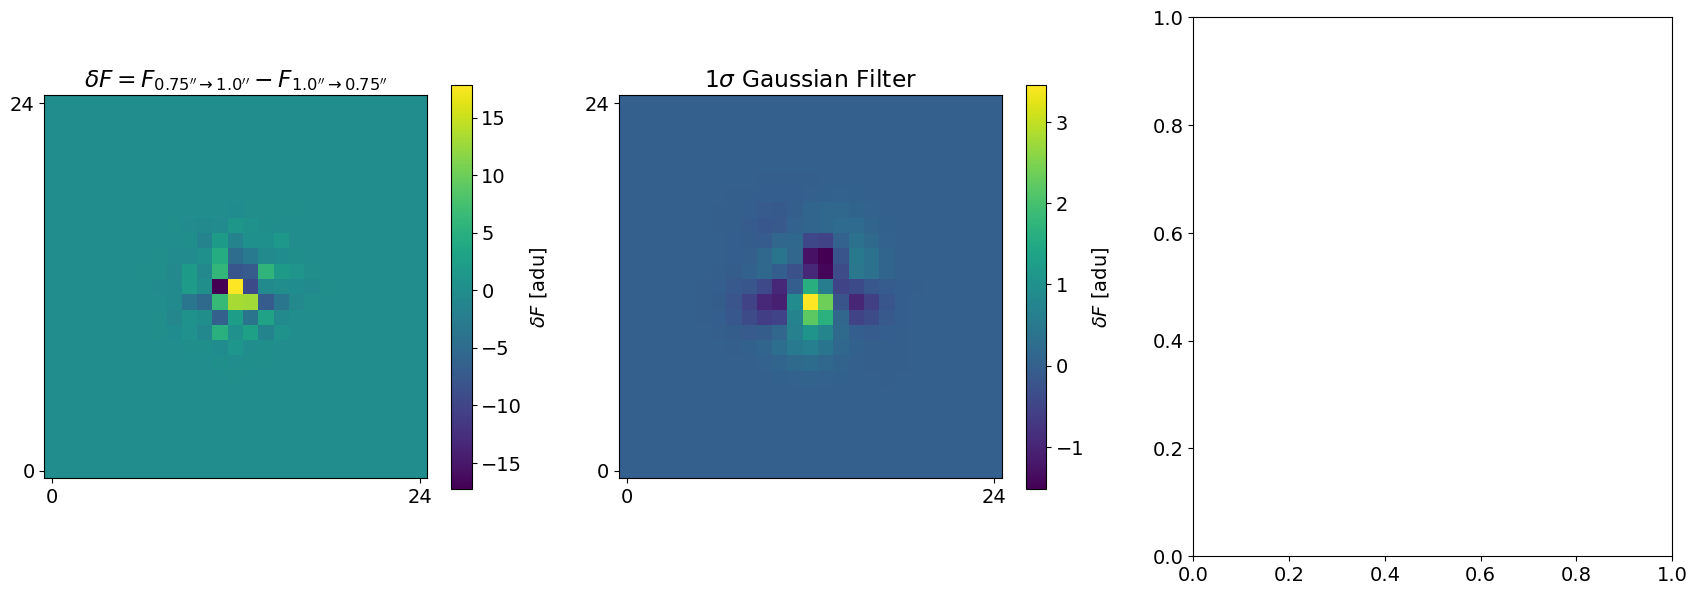

In [6]:
diff = np.asarray(small2large_data[8]['image_mean']) - np.asarray(large2small_data[8]['image_mean'])
smooth_diff = gaussian_filter(diff,1.)
sig_diff = np.divide(np.asarray(small2large_data[8]['image_mean']) - np.asarray(large2small_data[8]['image_mean']), np.sqrt(np.asarray(small2large_data[8]['image_mean'])) / np.sqrt(1000))
frac_diff = np.divide(np.asarray(small2large_data[8]['image_mean']) - np.asarray(large2small_data[8]['image_mean']), np.asarray(small2large_data[8]['image_mean']))
sig_diff[np.isnan(sig_diff)] = 0
frac_diff[np.isnan(frac_diff)] = 0
smooth_sig_diff = gaussian_filter(sig_diff,1.)

#frac_diff = np.nan_to_num(frac_diff, copy=True, nan=0.0)

matplotlib.rcParams.update({'font.size': 14})

fig, axs = plt.subplots(1,3, figsize=(21,7))

im1 = axs[0].imshow(diff, origin='lower')
axs[0].set_title(r"$\delta F = F_{0.75{''} \rightarrow 1.0{''}} - F_{1.0{''} \rightarrow 0.75{''}}$")
axs[0].set_xticks([0,24])
axs[0].set_yticks([0,24])
plt.colorbar(im1,shrink=0.75,label="$\delta F $ [adu]")


im2 = axs[1].imshow(smooth_diff, origin='lower')
axs[1].set_title(r"$1\sigma$ Gaussian Filter")
axs[1].set_xticks([0,24])
axs[1].set_yticks([0,24])
plt.colorbar(im2,shrink=0.75,label="$\delta F $ [adu]")


#im3 = axs[2].imshow(frac_diff, origin='lower')
#axs[2].set_title(r"$1\sigma$ Gaussian Filter")
#axs[2].set_xticks([0,24])
#axs[2].set_yticks([0,24])
#plt.colorbar(im3,shrink=0.75,label=r'$\delta F / \sigma_{1000} $)' ) 